In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from pandas import datetime
import math
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [31]:
df = pd.read_csv("data.csv")


In [32]:
df.columns

Index(['Tanggal ', 'IHK_UMUM_D_2012', 'Makanan dan minuman tidak beralkohol',
       'Minuman beralkohol dan tembakau', 'Pakaian dan alas kaki',
       'Perumahan, air, listrik, gas, dan bahan bakar lainnya',
       'Furnitur, perlengkapan rumah tangga, dan perbaikan rutin rumah',
       'Kesehatan', 'Transportasi', 'Komunikasi', 'Rekreasi dan kebudayaan',
       'Pendidikan', 'Penyediaan makan minum dan akomodasi',
       'Barang dan jasa lainnya'],
      dtype='object')

In [33]:
X = df[[ 'Makanan dan minuman tidak beralkohol',
       'Minuman beralkohol dan tembakau', 'Pakaian dan alas kaki',
       'Perumahan, air, listrik, gas, dan bahan bakar lainnya']]
Y = df[[ 'IHK_UMUM_D_2012']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [34]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (122, 4)
y_train (122, 1)
X_test (31, 4)
y_test (31, 1)


In [58]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size = 100, epochs = 80, validation_split=0.01)

/home/kevinpnjt/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 340ms/step - loss: 15439.5664 - val_loss: 20343.4648
Epoch 2/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 15446.5371 - val_loss: 20338.1465
Epoch 3/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 15442.4619 - val_loss: 20333.4258
Epoch 4/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 15406.7617 - val_loss: 20327.5605
Epoch 5/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 15362.2686 - val_loss: 20320.7305
Epoch 6/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 15385.6709 - val_loss: 20312.7266
Epoch 7/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 15338.7236 - val_loss: 20303.2812
Epoch 8/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 15430.9746 - val_loss: 20292.2227
Epoch 9/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 15339.6416 - val_loss: 20279.2578
Epoch 10/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 15361.4600 - val_loss: 20264.1426
Epoch 11/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 15373.4326 - val_loss: 20246.0

In [59]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 9.44 MSE (3.07 RMSE)
Test Score: 24.89 MSE (4.99 RMSE)


In [60]:
from sklearn.metrics import mean_absolute_percentage_error
trainScore = mean_absolute_percentage_error(Y_train, classifier.predict(X_train))
print('Train Score: %.2f MAPE' % trainScore)
testScore = mean_absolute_percentage_error(Y_test, classifier.predict(X_test))
print('Test Score: %.2f MAPE' % testScore)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Train Score: 0.02 MAPE
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Test Score: 0.03 MAPE


In [61]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 9.44 MSE (3.07 RMSE)
Test Score: 24.89 MSE (4.99 RMSE)


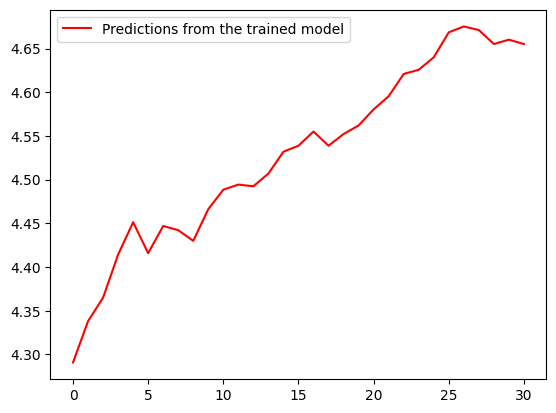

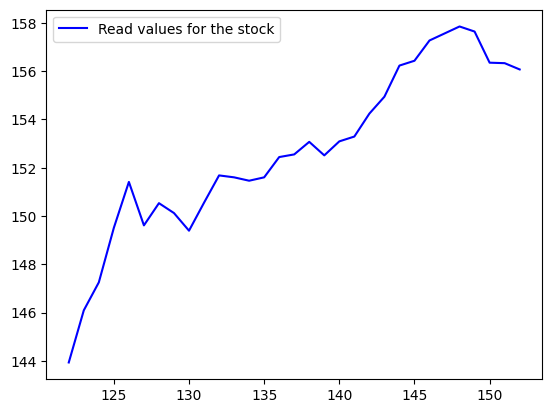

In [62]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()